In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
len(df.columns)

18

Pada kasus ini, saya memutuskan untuk menghapus kolom 'Administrative', 'Informational', dan 'ProductRelated' karena kolom-kolom tersebut mewakili jumlah halaman yang dikunjungi oleh pengguna dalam masing-masing kategori, dan total jumlah halaman yang dikunjungi sudah tercakup oleh kolom 'PageValues'. Oleh karena itu, kolom-kolom ini dianggap tidak perlu dan tidak berguna untuk analisis.

In [10]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [11]:
len(df.columns)

15

Pada dataset, terdapat beberapa kolom dengan variabel kategori, seperti 'Month', 'VisitorType', 'OperatingSystem', dan 'Browser'.

Algoritma machine learning umumnya membutuhkan inputan numerik, maka dari itu kita perlu mengubah data kategorikal kedalam format numerik. Pada prject ini saya akan menggunakan teknik Label encoding untuk mengkonversi variabel kategori ke format numerik

Label encoding memberikan nilai numerik yang unik untuk setiap kategori variabel. Sebagai contoh, untuk kolom 'Month', kita dapat memberikan nilai numerik 1 untuk bulan Januari, 2 untuk bulan Februari, dan seterusnya. Pengkodean label cocok untuk variabel kategorikal yang memiliki urutan alami, seperti 'Month' dan 'VisitorType'.


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categorical_columns = ['Weekend', 'Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoder values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoder values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoder values: [0 1]




In [14]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar':3, 'May':5, 'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [15]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


Next, let's explore the duplicated data!

In [16]:
df.duplicated().value_counts()  #to see the count of duplicated rows

False    12157
True       173
dtype: int64

In [17]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

Saya perlu membuang nilai yang terduplikasi dari kumpulan data karena dapat memengaruhi akurasi model. Nilai yang terduplikasi dapat menyebabkan bias pada data, yang dapat menyebabkan prediksi yang salah. Oleh karena itu, saya akan membuangnya sebelum melakukan analisis atau membangun model.

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

MinMaxScaler adalah teknik preprocessing yang menskalakan semua nilai dalam fitur yang diberikan agar berada dalam kisaran 0 dan 1. Hal ini dilakukan untuk membawa semua fitur ke skala yang sama dan menghindari satu fitur mendominasi fitur yang lain dalam model yang menggunakan algoritme berbasis jarak. Metode fit_transform() dari objek scaler menyesuaikan scaler dengan data dan mentransformasikan data menggunakan scaler dalam satu langkah.

### EXPLORATORY DATA ANALYSIS

In [20]:
grouped_data = df.groupby('TrafficType')

# calcuoated avg revenue per traffic type
avg_revenue = grouped_data['Revenue'].mean()

# calculated total revenu per traffic type
total_revenue = grouped_data['Revenue'].sum()

# compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Averga Revenue' : avg_revenue, 'Total Revenue' : total_revenue})

# Print the revenue comparison
print(revenue_comparison)

             Averga Revenue  Total Revenue
TrafficType                               
1                  0.110455            262
2                  0.216624            847
3                  0.090000            180
4                  0.155075            165
5                  0.215385             56
6                  0.119910             53
7                  0.300000             12
8                  0.277778             95
9                  0.097561              4
10                 0.200000             90
11                 0.190283             47
12                 0.000000              0
13                 0.060140             43
14                 0.153846              2
15                 0.000000              0
16                 0.333333              1
17                 0.000000              0
18                 0.000000              0
19                 0.058824              1
20                 0.259067             50


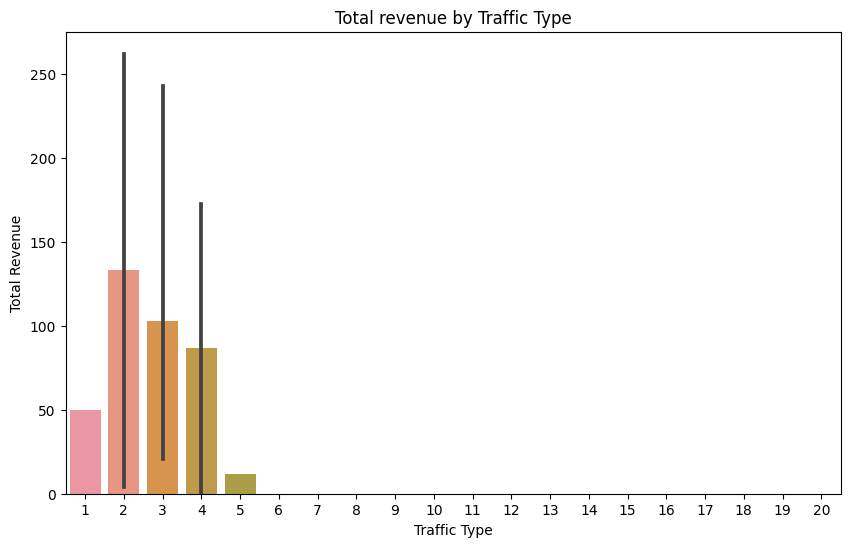

In [21]:
# sort the revenue comparison datframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# viz the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y = 'Total Revenue')
plt.title('Total revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.show()

Traffic Type 2 dan Traffic Type 3 menghasilkan total pendapatan tertinggi, yang mengindikasikan bahwa kedua sumber traffic ini mengarahkan traffic yang paling berharga ke situs web.
Penting untuk fokus pada pengoptimalan dan memaksimalkan trafik dari Tipe Trafik 2 dan Tipe Trafik 3, karena keduanya telah terbukti menjadi sumber pendapatan yang paling berharga untuk situs web

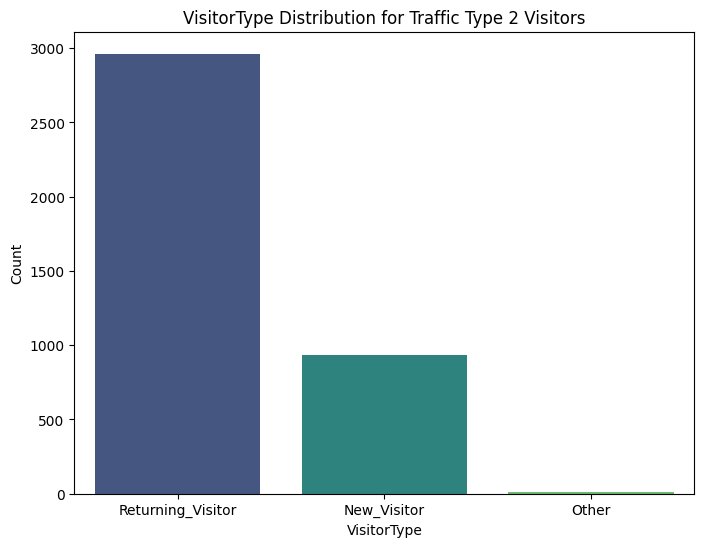

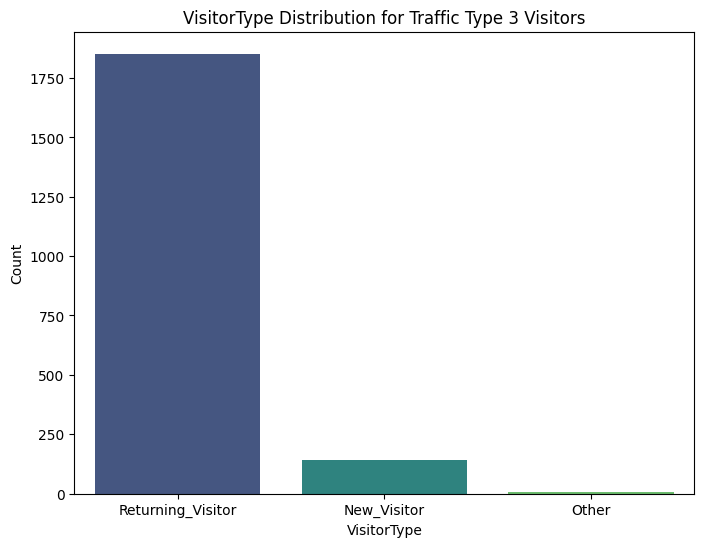

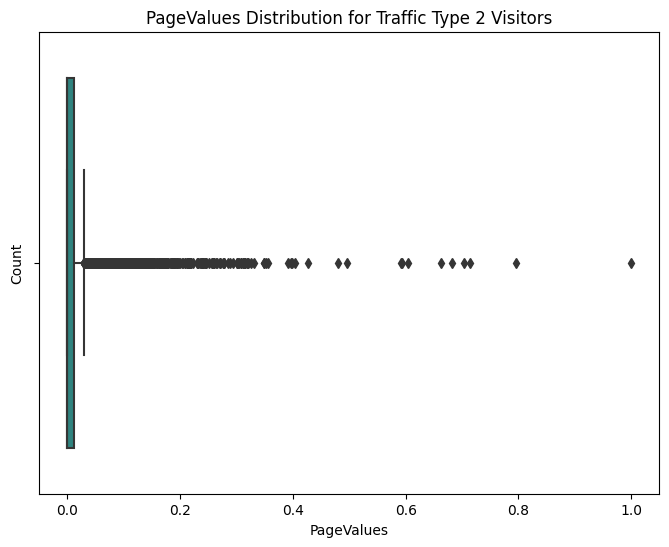

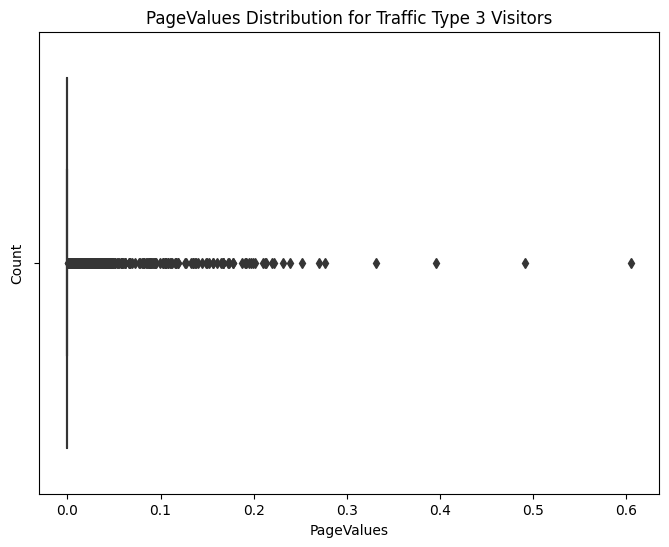

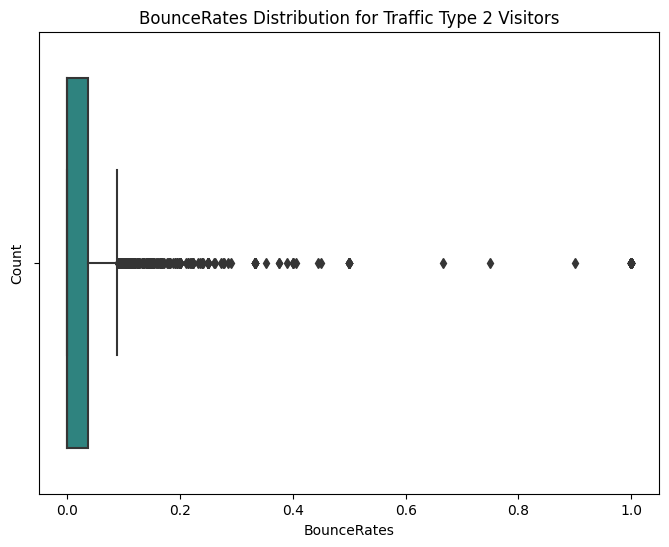

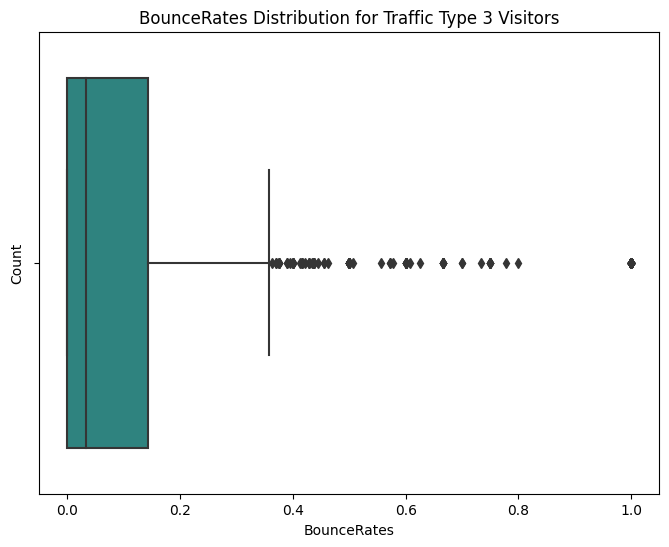

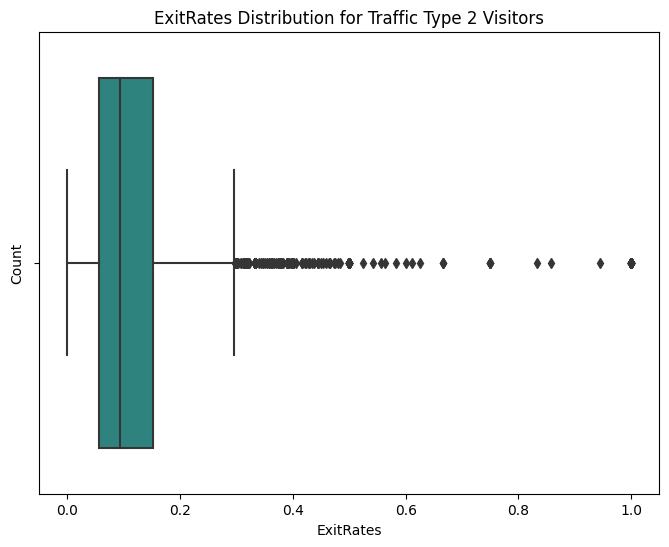

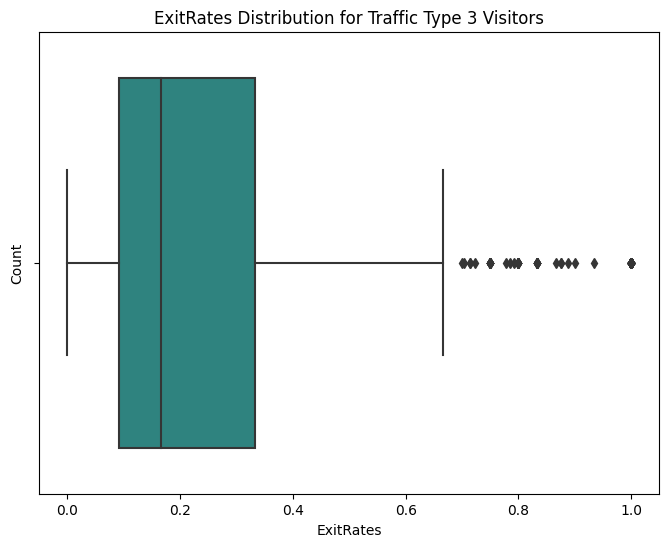

In [22]:
# Filter the dataset for the Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Demograpic analysis
demograpic_var = ['VisitorType']

for variable in demograpic_var:
    plt.figure(figsize=(8,6))
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Behavioral analysis
behavioral_var = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_var:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

Rata-rata page values untuk pengunjung Tipe Traffic 2 lebih tinggi dibandingkan dengan pengunjung Tipe Traffic 3, yang mengindikasikan bahwa pengunjung dari Tipe Traffic 2 lebih mungkin menghasilkan pendapatan di situs web.

Bounce rates dan Exit rates untuk pengunjung Tipe Traffic 2 relatif rendah dengan tipe Traffic lainnya. Hal ini menunjukkan bahwa pengunjung yang berasal dari Tipe Traffic 2 memiliki tingkat keterlibatan yang lebih tinggi dan cenderung menjelajahi beberapa halaman sebelum meninggalkan situs web. Hal ini membuat mereka menjadi sumber traffic yang berharga untuk menghasilkan pendapatan.


Bounce rates dan Exit rates untuk pengunjung Tipe Traffic 3 lebih tinggi dibandingkan dengan tipe traffic lainnya. Hal ini menunjukkan bahwa pengunjung yang berasal dari Traffic Type 3 mungkin memiliki tingkat keterlibatan yang lebih rendah dengan situs web, yang mengarah ke kemungkinan yang lebih tinggi untuk meninggalkan situs web tanpa interaksi lebih lanjut.

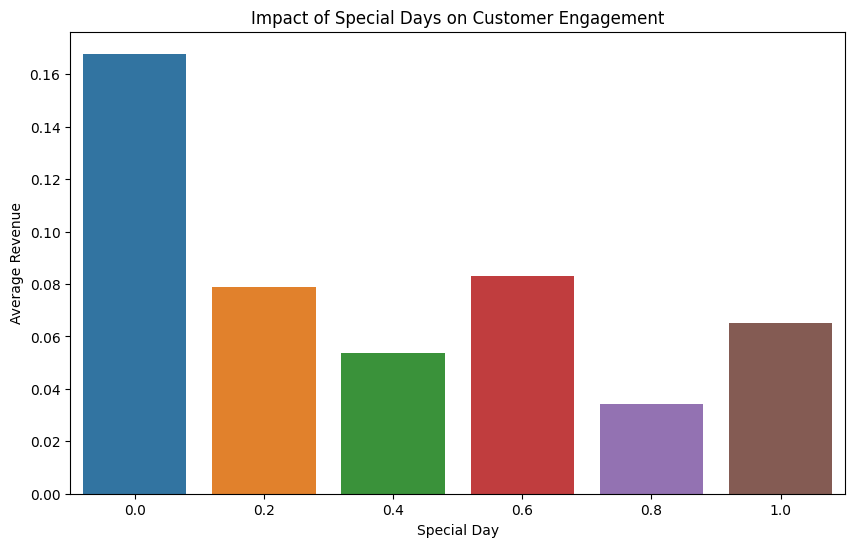

Special Days with the Higest Impact on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842
- 1.0: 0.06493506493506493
- 0.4: 0.05371900826446281


In [23]:
# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()

# Sort the data in descending order based on the average revenue
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Viz the impact of special days on customer engagement
plt.figure(figsize=(10,6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue")
plt.show()

# Identify the special days with the higest impact on customer engagement
top_special_days = special_day_analysis.head(5)

print("Special Days with the Higest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f'- {day}: {impact}')

<ipython-input-24-816d1b8c1252>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

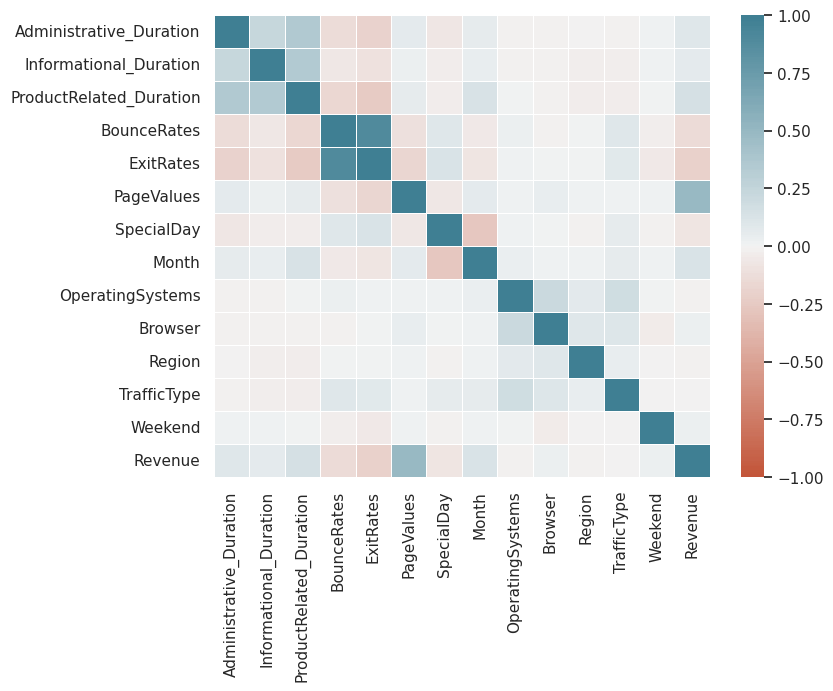

In [24]:
corr = df.corr()
sns.set(style='dark')
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)

Dari matrik korelasi diatas dari kumpulan data pembelanja online, kita dapat melihat hal berikut :

Fitur Exit rates dan Bouce rates cukup berkorelasi, hal yang masuk akal karena keduanya terkait dengan pengunjung yang meninggalkan situs web.

Fitur PageValues berkorelasi lemah dengan fitur lainnya, yang menunjukkan bahwa fitur ini mungkin tidak memiliki dampak yang kuat dalam memprediksi apakah pengunjung akan melakukan pembelian atau tidak.

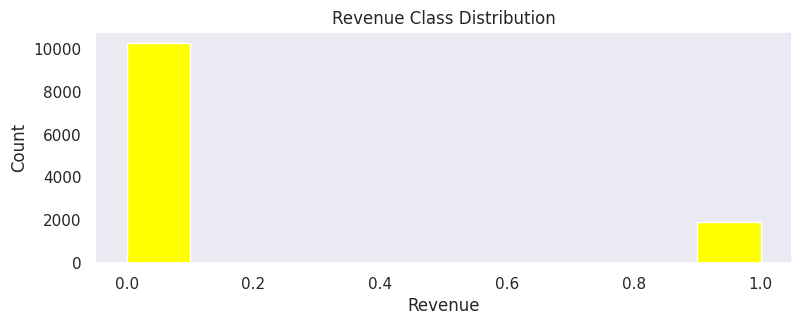

In [25]:
plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='yellow')

plt.title("Revenue Class Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

Visualisasi di atas membantu untuk memahami distribusi variabel target, yaitu kelas pendapatan. Dalam kasus masalah klasifikasi biner seperti ini, penting untuk memiliki distribusi kelas yang seimbang. Kita dapat melihat bahwa ada ketidakseimbangan kelas di sini yang dapat menyebabkan model bias yang berkinerja buruk pada kelas minoritas.

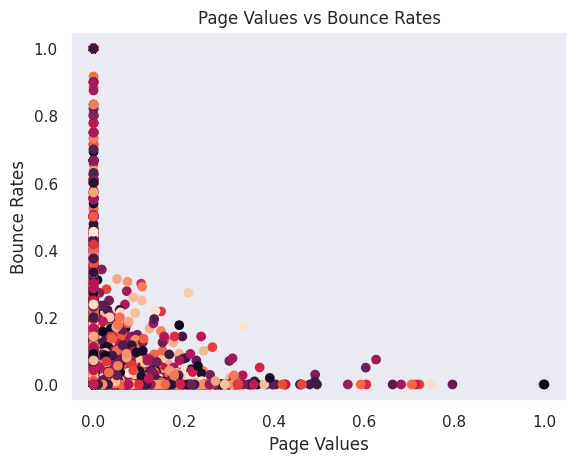

In [26]:
N = len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'], c = colors)
plt.title("Page Values vs Bounce Rates")
plt.xlabel("Page Values")
plt.ylabel("Bounce Rates")
plt.show()

Kita dapat mengamati bahwa terdapat tren umum dimana Page Values yang lebih tinggi cenderung memiliki Bunce Rates yang lebih rendah. Hal ini dapat mengindikasikan bahwa pengguna lebih cenderung bertahan di situs web jika halaman tersebut memberikan informasi atau produk yang lebih berharga. Namu ada juga banyak titik data dengan Page Values rendah dan Bounce Rates rendah, yang menunjukkan bahwa mungkin terdapat faktor lain yang berperan.

### Handling Class Imbalance

In [27]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [28]:
df['Revenue'].value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [29]:
X = df.drop('Revenue', axis = 1)
y = df['Revenue']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Parameter stratify pada fungsi train_test_split dalam scikit-learn digunakan untuk memastikan bahwa distribusi kelas pada data terbagi dengan proporsi yang sama antara set pelatihan dan set pengujian. Dengan kata lain, jika kita memiliki data yang tidak seimbang dari segi kelas (kelas-kelas yang berbeda memiliki jumlah yang sangat berbeda), menggunakan stratify akan membantu memastikan bahwa setiap set (pelatihan dan pengujian) mewakili proporsi kelas yang sama seperti dalam dataset asli.

In [31]:
y_train.value_counts()

0    8199
1    1526
Name: Revenue, dtype: int64

In [32]:
y.value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [33]:
y_test.value_counts()

0    2050
1     382
Name: Revenue, dtype: int64

In [34]:
X_train.shape

(9725, 14)

In [35]:
X_test.shape

(2432, 14)

In [36]:
X_train.head(10)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,Returning_Visitor,1
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,Returning_Visitor,0
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,Returning_Visitor,0
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,Returning_Visitor,0
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,Returning_Visitor,0


Kita akan menggunakan teknik SMOTE untuk mengatasi imbalance class

In [37]:
from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoding features and target var
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target var to a pandas Series
y_sm = pd.Series(y_sm)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=15, stratify=y_sm)

In [39]:
y_train.value_counts()

0    8199
1    8199
Name: Revenue, dtype: int64

### COMPARING MACHINE LEARNING MODELS

In [40]:
pip install lazypredict

In [41]:
from lazypredict.Supervised import LazyClassifier

In [42]:
clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)

In [43]:
models, prediction = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [02:00<00:02,  2.31s/it]

[LightGBM] [Info] Number of positive: 8199, number of negative: 8199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1862
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [02:01<00:00,  4.19s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
RandomForestClassifier             0.93               0.93     0.93      0.93   
XGBClassifier                      0.92               0.92     0.92      0.92   
BaggingClassifier                  0.92               0.92     0.92      0.92   
LGBMClassifier                     0.92               0.92     0.92      0.92   
LabelPropagation                   0.91               0.91     0.91      0.91   
LabelSpreading                     0.91               0.91     0.91      0.91   
AdaBoostClassifier                 0.90               0.90     0.90      0.90   
KNeighborsClassifier               0.88               0.88     0.88      0.88   
SVC                                0.88               0.88     0.88      0.88   
DecisionTreeClassifier      

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make prediction on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy : 0.925609756097561
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2050
           1       0.91      0.95      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



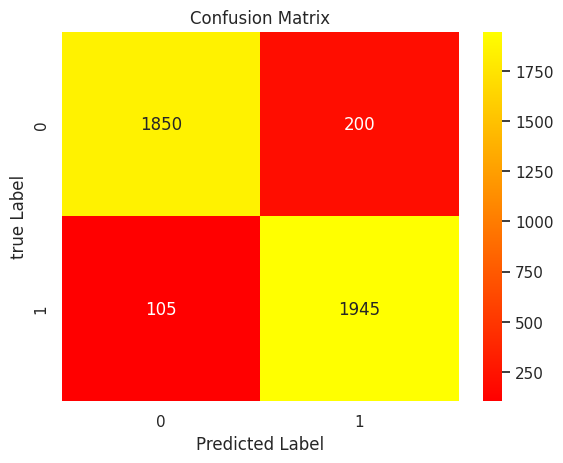

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap="autumn")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("true Label")
plt.show()

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [47]:
et = ExtraTreesClassifier(n_estimators=100, random_state = 42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy : ', accuracy_et)

print(f'Accuracy : {accuracy_et}')
print(classification_report(y_test, y_pred))

Extra Trees Accuracy :  0.937560975609756
Accuracy : 0.937560975609756
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2050
           1       0.92      0.96      0.94      2050

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



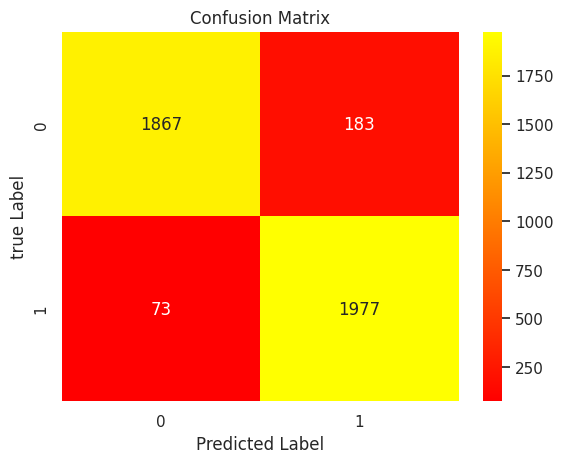

In [48]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap="autumn")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("true Label")
plt.show()

Maka kita akan memilih model Extra Trees Classifier karena memiliki tingkat akurasi paling tinggi yaitu 94%!

Time to Test!

In [49]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Kita akan memasukkan data baru berupa inputan user dan memprediksi apakah pelanggan tersebut akan membeli atau tidak.

In [52]:
# Define user input as dictionary
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Create DataFrame from the user input dict
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

# Map VisitatorType to binary columns
visitor_type_mapping = {
    'New_Visitor' : 1,
    'Other' : 0,
    'Returning_Visitor' : 0
}

user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drope the original Visitor type Column
user_df.drop('VisitorType', axis = 1, inplace = True)

# Make a predicition for the user input
predicition = et.predict(user_df)
print(predicition)

[0]


Dari input yang diberikan, terbukti bahwa pelanggan tidak mungkin melalukan pembelian secara online.

Kita dapat memberikan model set input yang berbeda dan memprediksi apakah pelanggan yang mengunjungi situs web belanja online akan melakukan pembelian atau tidak.

**Note :** Prediksi tergantung pada akurasi model yang digunakan, pada kasus ini akurasi prediksi sekitar **94%!**